## AI-Powered Customer Purchase Analysis
## Classification using Clustering
This notebook contains classifications using clustering

This project is part of coding assignment for a position at BookedBy

Author @Suchit Singh Nagpal (sn3791@rit.edu)

Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Data Load

In [3]:
# Load data
df = pd.read_csv("data/customer_purchases3.csv")

Feature Engineering

Create features for clustering:

**Frequency**: Number of orders per customer.

**Total Spending**: Total purchase amount per customer.

**Category Preferences**: Percentage of spending in each category.



In [4]:
# Calculate frequency and total spending

customer_data = df.groupby('Customer ID').agg(
    frequency=('Order ID', 'nunique'),  # Number of unique orders
    total_spending=('Purchase Amount', 'sum')  # Total spending
).reset_index()

# Calculate category preferences
category_spending = df.groupby(['Customer ID', 'Product Category'])['Purchase Amount'].sum().unstack(fill_value=0)
category_spending = category_spending.div(category_spending.sum(axis=1), axis=0)  # Normalize to percentages

# Merge features
customer_data = customer_data.merge(category_spending, on='Customer ID')

Data Preprocessing

Standardize features for clustering.

In [5]:
# Select features for clustering
features = ['frequency', 'total_spending'] + list(category_spending.columns)
X = customer_data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine Optimal Number of Clusters (Elbow Method)

Use the elbow method to find the optimal number of clusters.

In [6]:
# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

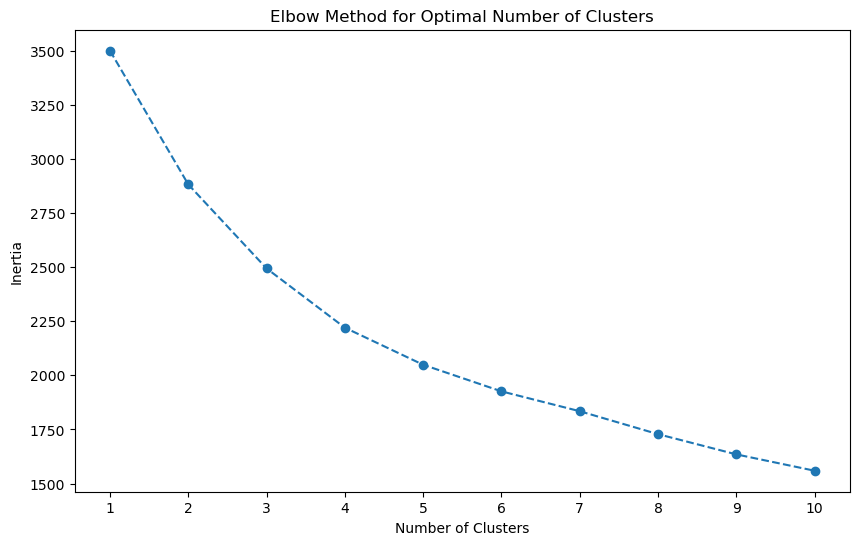

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

Perform K-Means Clustering

Use the optimal number of clusters (i.e., 4 in this case).

In [8]:
# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics and assign intuitive labels.

# Calculate cluster means
cluster_means = customer_data.groupby('Cluster')[features].mean()

# Assign intuitive labels
cluster_labels = {
    0: "Budget Shoppers",
    1: "Frequent Buyers",
    2: "High Spenders",
    3: "Occasional Shoppers"
}
customer_data['Segment'] = customer_data['Cluster'].map(cluster_labels)

C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


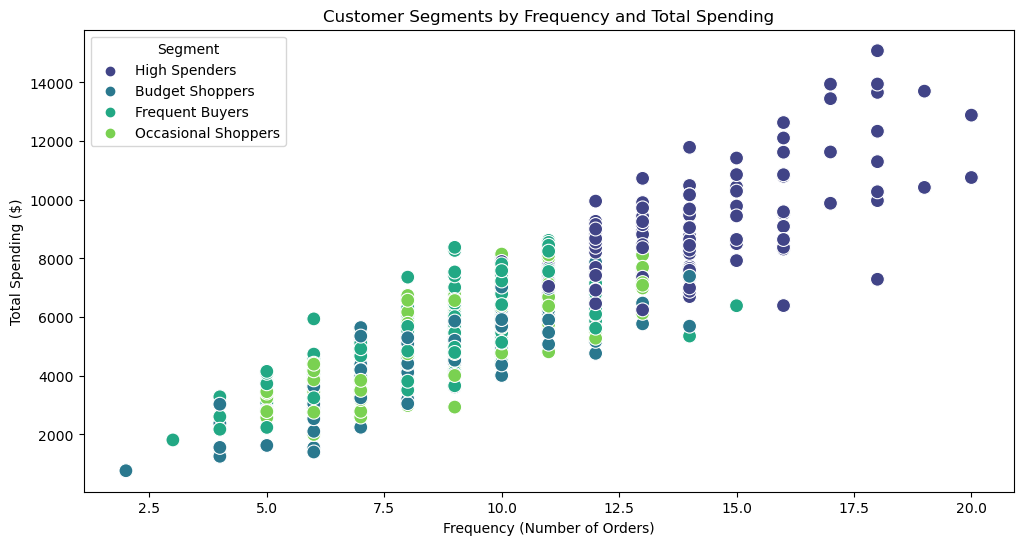

In [9]:
# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=customer_data['frequency'], y=customer_data['total_spending'], 
                hue=customer_data['Segment'], palette='viridis', s=100)
plt.title('Customer Segments by Frequency and Total Spending')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Total Spending ($)')
plt.legend(title='Segment')
plt.show()

As speculated, the nature of the cluster plot for these attributes is linear, since there exist a strong corelation between frequency and spending. The data is almost uniform, with each order value being similar as we observed in the previous anaylsis.

Cluster Profiles

Display the characteristics of each cluster.

In [10]:
print(cluster_means)

         frequency  total_spending     Books  Clothing  Electronics  \
Cluster                                                               
0         8.658333     4825.847500  0.079754  0.205321     0.271182   
1         8.684564     5557.986376  0.052476  0.117934     0.438365   
2        13.941176     9082.796891  0.061266  0.133234     0.346515   
3         9.000000     5369.260268  0.064363  0.145801     0.254198   

         Home & Kitchen    Sports  
Cluster                            
0              0.234387  0.209357  
1              0.174006  0.217219  
2              0.196385  0.262599  
3              0.148894  0.386743  


# 3D clusters for Frequency, Spending and Category

Play around with different categories

In [11]:
features = customer_data[['frequency', 'total_spending', 'Sports']].values

# Set the number of clusters to 3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features)

cluster_labels = {
    0: 'Active Bargain Hunters',
    1: 'Elite Category Enthusiasts',
    2: 'Casual Shoppers'
}
customer_data['Cluster Label'] = customer_data['Cluster'].map(cluster_labels)



C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Plot

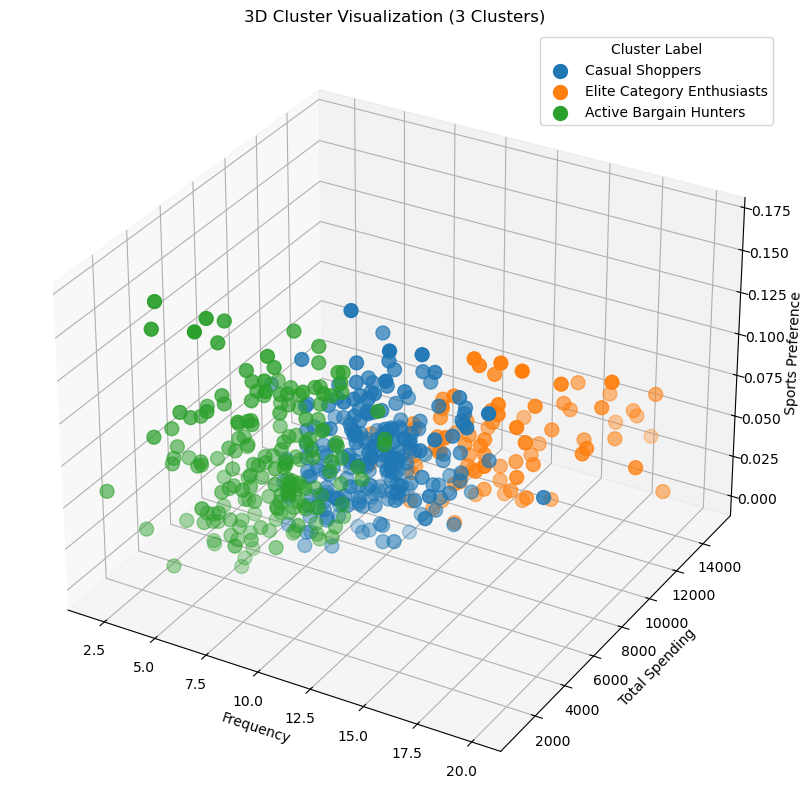

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster group separately so that they have labels in the legend
for label in customer_data['Cluster Label'].unique():
    subset = customer_data[customer_data['Cluster Label'] == label]
    ax.scatter(
        subset['frequency'],
        subset['total_spending'],
        subset['Books'],  # Adjust this column if your z-axis represents a different metric.
        s=100,
        label=label  # This label appears in the legend.
    )

ax.set_xlabel('Frequency')
ax.set_ylabel('Total Spending')
ax.set_zlabel('Sports Preference')  # Update this label if needed.
plt.title('3D Cluster Visualization (3 Clusters)')
plt.legend(title="Cluster Label")
plt.show()


# Agglomerative Clustering for Products

Import Necessary Libraries

In [13]:
from sklearn.cluster import AgglomerativeClustering

Perform Clustering

In [14]:
# Aggregating data by Product
product_data = df.groupby('Product ID').agg(
    total_purchase_amount=('Purchase Amount', 'sum'),
    order_count=('Order ID', 'nunique')
).reset_index()

# Apply AgglomerativeClustering
agg_clustering_product = AgglomerativeClustering(n_clusters=4, linkage='ward')
product_data['Cluster'] = agg_clustering_product.fit_predict(product_data[['total_purchase_amount', 'order_count']])

# Assigning Intuitive Labels to Clusters
product_data['Cluster Label'] = product_data['Cluster'].map({
    0: 'Medium-Value, Medium-Demand Products',
    1: 'High-Value, Low-Demand Products',
    2: 'Low-Value, High-Demand Products',
    3: 'High-Value, High-Demand Products'
})

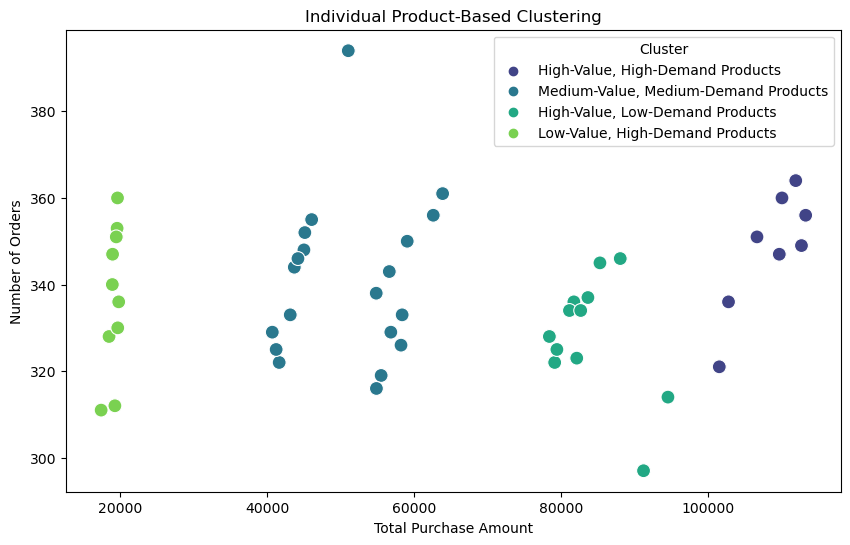

  Product ID  total_purchase_amount  order_count  Cluster  \
0         P1              112667.72          349        3   
1        P10              111891.99          364        3   
2        P11               43146.03          333        0   
3        P12               41639.88          322        0   
4        P13               46058.85          355        0   
5        P14               45132.08          352        0   
6        P15               45009.39          348        0   
7        P16               41228.19          325        0   
8        P17               51037.87          394        0   
9        P18               43697.52          344        0   

                          Cluster Label  
0      High-Value, High-Demand Products  
1      High-Value, High-Demand Products  
2  Medium-Value, Medium-Demand Products  
3  Medium-Value, Medium-Demand Products  
4  Medium-Value, Medium-Demand Products  
5  Medium-Value, Medium-Demand Products  
6  Medium-Value, Medium-Demand Pro

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_data, x='total_purchase_amount', y='order_count', hue='Cluster Label', palette='viridis', s=100)
plt.title("Individual Product-Based Clustering")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Number of Orders")
plt.legend(title="Cluster")
plt.show()

# Display the cluster data
# print(product_data[['Product ID', 'Cluster Label']])
print(product_data[:10])


# RFM : Recency, Frequency, Monetary Analysis

In [16]:
# Ensure 'Purchase Date' is in datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Calculate RFM values for each customer
today = df['Purchase Date'].max() + pd.Timedelta(days=1)  # Latest bill date
rfm = df.groupby('Customer ID').agg(
    Recency=('Purchase Date', lambda x: (today - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Purchase Amount', 'sum')
).reset_index()

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

Elbow Analysis for RFM

C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

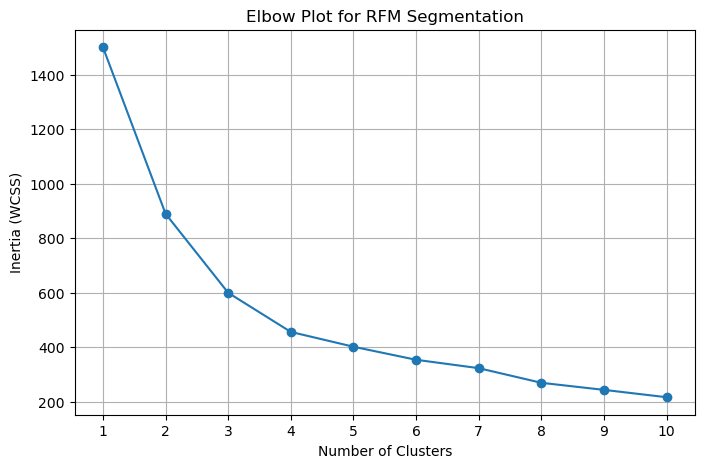

In [17]:
# Define a range of cluster numbers to try, for example from 1 to 10
cluster_range = range(1, 11)
inertia_values = []

# Compute KMeans clustering for each number of clusters and store the inertia (WCSS)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Plot for RFM Segmentation')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


Perform Clustering

In [18]:
# Apply KMeans clustering (use optimal n_clusters, i.e.  3 in this case observed from graph above)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Define intuitive labels for the clusters
cluster_labels = {
    0: 'Budget Regulars',
    1: 'Frequent High Rollers',
    2: 'At Risk Customers',
}

rfm['Cluster Label'] = rfm['Cluster'].map(cluster_labels)
mean_monetary = rfm['Monetary'].mean()

C:\Users\suchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


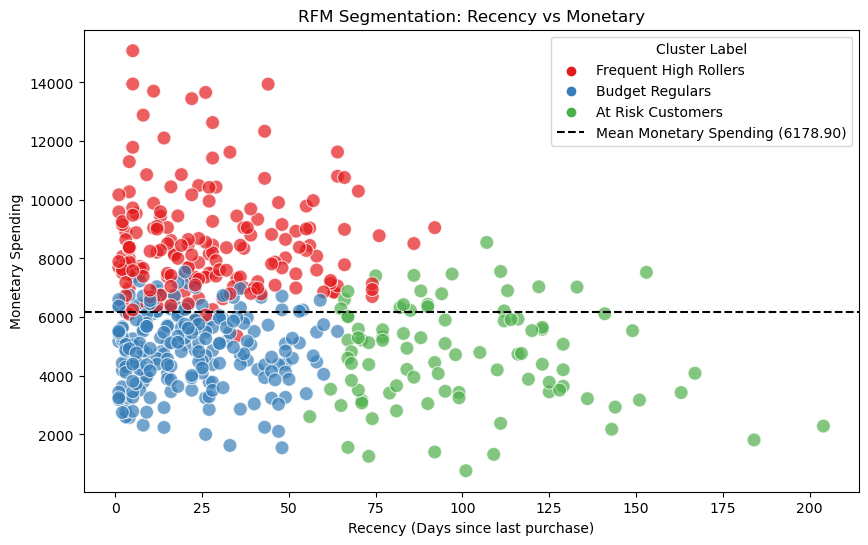

    Customer ID  Recency  Frequency  Monetary  Cluster          Cluster Label
0            C1       28         13   7491.83        1  Frequent High Rollers
1           C10       26         18  13659.33        1  Frequent High Rollers
2          C100       11         12   6500.60        1  Frequent High Rollers
3          C101       35         14   5353.91        1  Frequent High Rollers
4          C102       55         15   9785.58        1  Frequent High Rollers
..          ...      ...        ...       ...      ...                    ...
495         C95       28         15  11422.79        1  Frequent High Rollers
496         C96      105          9   4793.56        2      At Risk Customers
497         C97       44         17  13941.50        1  Frequent High Rollers
498         C98        5          8   3813.56        0        Budget Regulars
499         C99       16         11   7047.33        1  Frequent High Rollers

[500 rows x 6 columns]


In [19]:
# Visualize the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster Label', palette='Set1', s=100, alpha=0.7)

# Calculate the mean Monetary value and add a horizontal line to the plot
plt.axhline(mean_monetary, color='black', linestyle='--', label=f'Mean Monetary Spending ({mean_monetary:.2f})')

plt.title('RFM Segmentation: Recency vs Monetary')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary Spending')
plt.legend(title='Cluster Label')
plt.show()

# Display the RFM DataFrame with Cluster Labels
print(rfm)
